In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from plotnine import *
from dataprep.eda import plot, plot_correlation
from IPython.display import Image
pd.set_option('display.max_columns', None)

In [2]:
#survey quality
#https://drive.google.com/file/d/1KULMATLW_kbcq4TOyDgHmMpyRptoq-0y/view?usp=sharing

In [3]:
#meta=pd.read_csv("../../metadata.csv")#,sep="\t")
meta=pd.read_csv("../../data/INHS_corrected_2020.06.09.csv")

#annotated webform data
qual=pd.read_csv("../../data/hdrwebform-data-1593444553769_20200629.csv") 
meta

,fileName,Family,Genus,scientificName,catalogNumber,fixedCatalogNumber
0,INHS_FISH_20096.JPG,Clupeidae,Alosa,Alosa alabamae,20096,20096
1,INHS_FISH_38236.JPG,Clupeidae,Alosa,Alosa alabamae,38236,38236
2,INHS_FISH_38418.JPG,Clupeidae,Alosa,Alosa alabamae,38418,38418
3,INHS_FISH_38440.JPG,Clupeidae,Alosa,Alosa alabamae,38440,38440
4,INHS_FISH_38781.JPG,Clupeidae,Alosa,Alosa alabamae,38781,38781
...,...,...,...,...,...,...
23083,INHS_FISH_60802.jpg,Leuciscidae,Semotilus,Semotilus atromaculatus,60802,60802
23084,INHS_FISH_65283.jpg,Leuciscidae,Semotilus,Semotilus atromaculatus,65283,65283
23085,INHS_FISH_107123.jpg,Leuciscidae,Semotilus,Semotilus atromaculatus,107123,107123
23086,INHS_FISH_66322.jpg,Triportheidae,Triportheus,Triportheus albus,66322,66322


In [4]:
list(qual)

['id',
 'image_name',
 'height',
 'width',
 'resolution',
 'if_fish',
 'if_ruler',
 'if_colorbar',
 'relative_path',
 'fish_number',
 'non_specimen_objects',
 'if_label',
 'if_overlapping',
 'specimen_angle',
 'specimen_view',
 'if_bent',
 'landmark_failures_number',
 'if_missing_parts',
 'brightness',
 'if_blur',
 'if_color_issue',
 'checked_flag',
 'specimen_angled',
 'specimen_viewing',
 'color_issues',
 'if_background_uniform',
 'if_parts_visible',
 'image_quality',
 'label_detailed',
 'if_each_fish_label',
 'if_fins_folded',
 'if_label_catalog_number_correct',
 'if_label_name_correct',
 'create_time',
 'update_time',
 'fixed_scientific_name',
 'scientific_name']

In [5]:
qual=qual.drop(columns=["fixed_scientific_name","scientific_name","resolution"]) #all NAN

In [6]:
moige=qual.set_index('image_name').join(meta.set_index('fileName'))
moige

,id,height,width,if_fish,if_ruler,if_colorbar,relative_path,fish_number,non_specimen_objects,if_label,if_overlapping,specimen_angle,specimen_view,if_bent,landmark_failures_number,if_missing_parts,brightness,if_blur,if_color_issue,checked_flag,specimen_angled,specimen_viewing,color_issues,if_background_uniform,if_parts_visible,image_quality,label_detailed,if_each_fish_label,if_fins_folded,if_label_catalog_number_correct,if_label_name_correct,create_time,update_time,Family,Genus,scientificName,catalogNumber,fixedCatalogNumber
INHS_FISH_11110.jpg,d19f2966-f205-4f23-b111-80a37aa1ed3a,4016,6016,True,True,False,/INHS/INHS_FISH_11110.jpg,1,no,True,False,NaN,NaN,False,NaN,False,normal,True,NaN,True,9,left,none,True,True,8.0,detailed,True,False,True,True,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Centrarchidae,Lepomis,Lepomis cyanellus,11110,11110.0
INHS_FISH_11136.jpg,2a13a25d-266a-4881-98a5-ef0ed1c007ae,4016,6016,True,True,False,/INHS/INHS_FISH_11136.jpg,1,no,True,False,NaN,NaN,False,NaN,False,normal,True,NaN,True,9,left,none,False,True,9.0,detailed,True,False,True,True,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Leuciscidae,Phenacobius,Phenacobius mirabilis,11136,11136.0
INHS_FISH_11140.jpg,ad935e2f-2b6d-4867-a650-1a4a1d13d84e,4016,6016,True,True,False,/INHS/INHS_FISH_11140.jpg,1,no,True,False,NaN,NaN,False,NaN,False,normal,True,NaN,True,9,left,none,True,True,10.0,detailed,True,False,True,True,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Centrarchidae,Lepomis,Lepomis cyanellus,11140,11140.0
INHS_FISH_11155.jpg,6dfb5db9-b2ce-4c26-8dc7-b8ae850f8a6f,4016,6016,True,True,False,/INHS/INHS_FISH_11155.jpg,1,no,True,False,NaN,NaN,False,NaN,False,normal,True,NaN,True,9,left,none,False,True,8.0,detailed,True,False,True,True,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Leuciscidae,Phenacobius,Phenacobius mirabilis,11155,11155.0
INHS_FISH_11217.jpg,e35f85fc-3bc3-4d5a-b8d3-d14b975a86b4,4016,6016,True,True,False,/INHS/INHS_FISH_11217.jpg,1,no,True,False,NaN,NaN,False,NaN,False,normal,True,NaN,True,9,left,none,True,True,9.0,detailed,True,False,True,True,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Centrarchidae,Lepomis,Lepomis cyanellus,11217,11217.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
INHS_FISH_99983.jpg,671b41a0-a658-4465-b3ea-4587e866177a,4016,6016,True,True,False,/INHS/INHS_FISH_99983.jpg,1,no,True,False,Left,Left,False,0.0,False,normal,True,False,True,9,left,none,True,True,9.0,detailed,True,False,True,True,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Centrarchidae,Lepomis,Lepomis macrochirus,99983,99983.0
INHS_FISH_9999.jpg,d5c15b90-2472-419c-ae41-0c6fac12cb16,4016,6016,True,True,False,/INHS/INHS_FISH_9999.jpg,1,no,True,False,Left,Left,False,0.0,False,normal,True,False,True,9,left,none,True,True,9.0,detailed,True,False,NaN,NaN,2020-06-18 07:04:46.913199-05,2020-06-18 10:39:05.144168-05,Centrarchidae,Lepomis,Lepomis megalotis,9999,9999.0
INHS_FISH_99992.jpg,14c3df45-759c-4be9-a87b-5bef0d24e3e2,4016,6016,True,True,False,/INHS/INHS_FISH_99992.jpg,1,no,True,False,Left,Left,False,0.0,False,normal,True,False,True,9,left,none,False,True,8.0,detailed,True,False,True,True,2020-06-18 07:04:46.913199-05,2020-06-18 15:41:54.482438-05,Leuciscidae,Notropis,Notropis atherinoides,99992,99992.0
INHS_FISH_99996.jpg,e4d4eadb-7327-429d-a7b0-1f1262c0df62,4016,6016,True,True,False,/INHS/INHS_FISH_99996.jpg,1,no,True,True,Left,Left,False,7.0,False,normal,True,True,True,9,lefttop,Anterior portion of speciemen is dark,False,True,5.0,detailed,True,False,NaN,NaN,2020-06-18 07:04:46.913199-05,2020-06-18 10:39:11.31656-05,Ictaluridae,Noturus,Noturus gyrinus,99996,99996.0


In [7]:
plot(moige)

In [8]:
moige['if_background_uniform']

INHS_FISH_11110.jpg               True
INHS_FISH_11136.jpg              False
INHS_FISH_11140.jpg               True
INHS_FISH_11155.jpg              False
INHS_FISH_11217.jpg               True
                                 ...  
INHS_FISH_99983.jpg               True
INHS_FISH_9999.jpg                True
INHS_FISH_99992.jpg              False
INHS_FISH_99996.jpg              False
INHS_FISH_INHS_FISH_74821.jpg     True
Name: if_background_uniform, Length: 1715, dtype: object

In [9]:
for incol in [col for col in moige if col.startswith('if')]:
    moige[incol] = moige[incol].astype(float)

In [10]:
len(moige['Genus'].unique())

20

In [11]:
df_num = moige.select_dtypes(include = ['float64', 'int64'])
plot_correlation(df_num)

/home/jnl47/Documents/dev/HGNN/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
/home/jnl47/Documents/dev/HGNN/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
/home/jnl47/Documents/dev/HGNN/lib/python3.7/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
/home/jnl47/Documents/dev/HGNN/lib/python3.7/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide


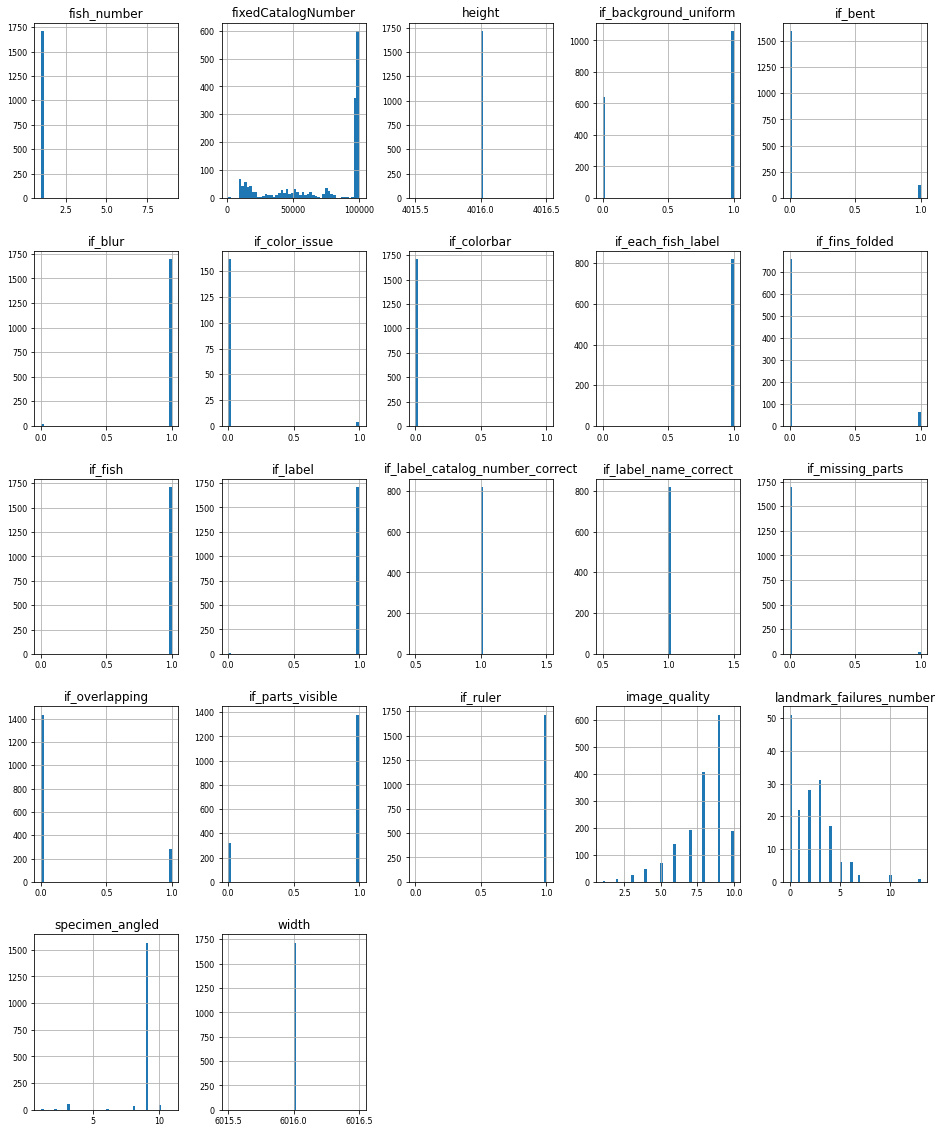

In [12]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

/home/jnl47/Documents/dev/HGNN/lib/python3.7/site-packages/plotnine/layer.py:369: PlotnineWarning: stat_count : Removed 15 rows containing non-finite values.


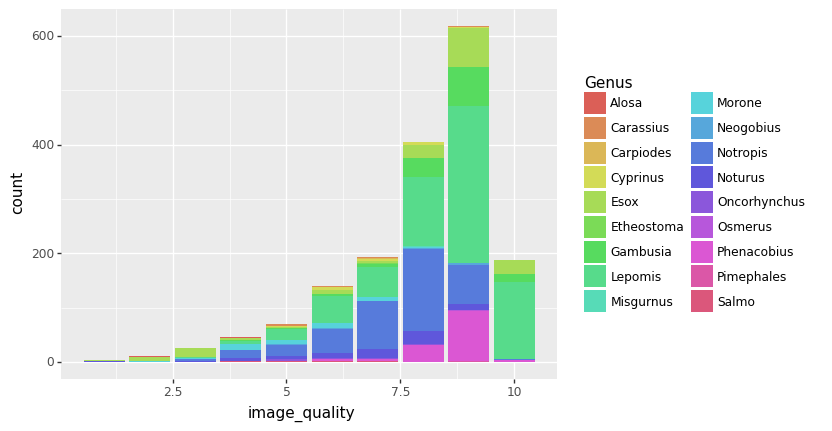

<ggplot: (8751319390605)>

In [13]:
#https://stackoverflow.com/questions/18400432/creating-multi-column-legend-in-ggplot
ggplot(moige[moige.Genus.notnull()],aes('image_quality',fill = 'Genus')) +  \
geom_bar(stat = 'count') +  \
guides(fill=guide_legend(ncol=2))

In [14]:
moige['above_median_image_quality']=moige['image_quality']>=np.nanmedian(moige['image_quality'])

In [15]:
moige['above_median_image_quality']

INHS_FISH_11110.jpg               True
INHS_FISH_11136.jpg               True
INHS_FISH_11140.jpg               True
INHS_FISH_11155.jpg               True
INHS_FISH_11217.jpg               True
                                 ...  
INHS_FISH_99983.jpg               True
INHS_FISH_9999.jpg                True
INHS_FISH_99992.jpg               True
INHS_FISH_99996.jpg              False
INHS_FISH_INHS_FISH_74821.jpg     True
Name: above_median_image_quality, Length: 1715, dtype: bool

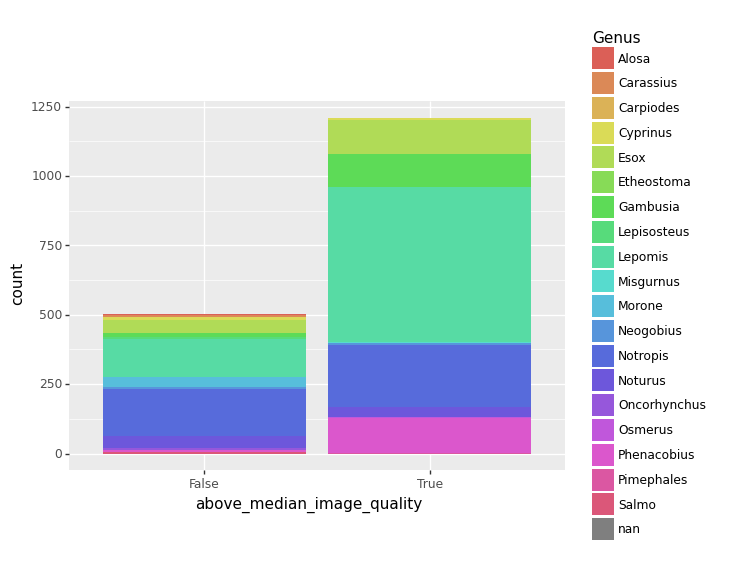

<ggplot: (8751319328865)>

In [16]:
ggplot(moige,aes('above_median_image_quality',fill = 'Genus')) + geom_bar(stat = 'count')

In [17]:
np.nanmedian(moige['image_quality'])

8.0

In [18]:
good_ifs = ['if_background_uniform','if_blur','if_parts_visible','if_label']
bad_ifs = ['if_bent','if_color_issue','if_fins_folded','if_missing_parts','if_overlapping']

In [19]:
for col in bad_ifs:
    moige[col] = -moige[col]

In [20]:
moige['qualSums']=moige[good_ifs].sum(axis=1)

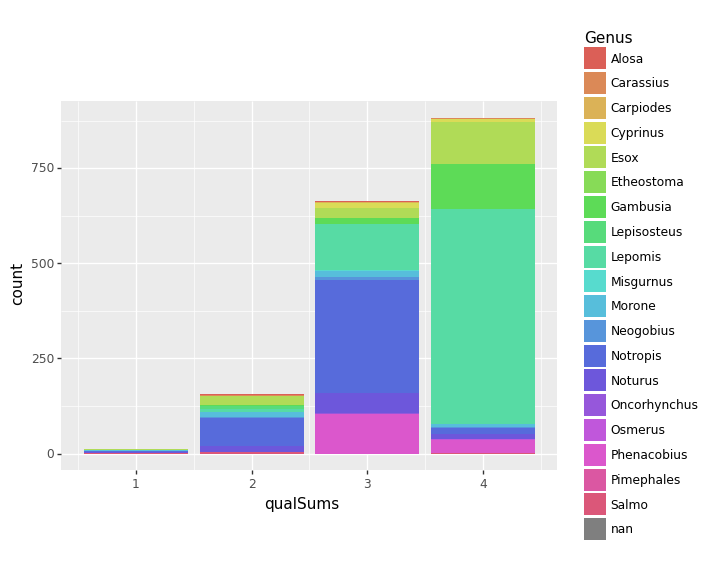

<ggplot: (8751318886185)>

In [21]:
ggplot(moige,aes('qualSums',fill = 'Genus')) + geom_bar(stat = 'count')

In [22]:
# counts of Etheostomas
moige['Genus']

INHS_FISH_11110.jpg                  Lepomis
INHS_FISH_11136.jpg              Phenacobius
INHS_FISH_11140.jpg                  Lepomis
INHS_FISH_11155.jpg              Phenacobius
INHS_FISH_11217.jpg                  Lepomis
                                    ...     
INHS_FISH_99983.jpg                  Lepomis
INHS_FISH_9999.jpg                   Lepomis
INHS_FISH_99992.jpg                 Notropis
INHS_FISH_99996.jpg                  Noturus
INHS_FISH_INHS_FISH_74821.jpg            NaN
Name: Genus, Length: 1715, dtype: object

In [23]:
moige['highiq'] = moige.image_quality>8
moige['lowiq'] = moige.image_quality<=8
moige['highqs'] = moige.image_quality>8
moige['lowqs'] = moige.image_quality<=8


#display mean qualSums and quality scores for each genera
moige \
.groupby('Genus') \
.agg(count=('id','size'), \
     mean_iq=('image_quality','mean'), \
     mean_qualSums=('qualSums','mean'), \
     gt_med_iq=('highiq','sum'), \
    lte_med_iq=('lowiq','sum')) \
.sort_values(by=['count', 'mean_qualSums'], ascending=False) \
.reset_index()
#df = df.groupby('source') \
#       .agg(count=('text', 'size'), mean_sent=('sent', 'mean')) \
#       .reset_index()
#print (df)

,Genus,count,mean_iq,mean_qualSums,gt_med_iq,lte_med_iq
0,Lepomis,693,8.478261,3.806638,431.0,259.0
1,Notropis,395,7.387342,2.832911,74.0,321.0
2,Esox,165,7.587879,3.484848,97.0,68.0
3,Phenacobius,137,8.627737,3.233577,97.0,40.0
4,Gambusia,135,8.578947,3.859259,85.0,48.0
5,Noturus,78,6.896104,2.923077,11.0,66.0
6,Morone,39,5.256410,2.717949,0.0,39.0
7,Cyprinus,20,6.950000,3.300000,3.0,17.0
8,Neogobius,12,7.416667,3.166667,4.0,8.0
9,Lepisosteus,9,NaN,2.000000,0.0,0.0


In [24]:
np.nanmedian(moige['qualSums'])

4.0

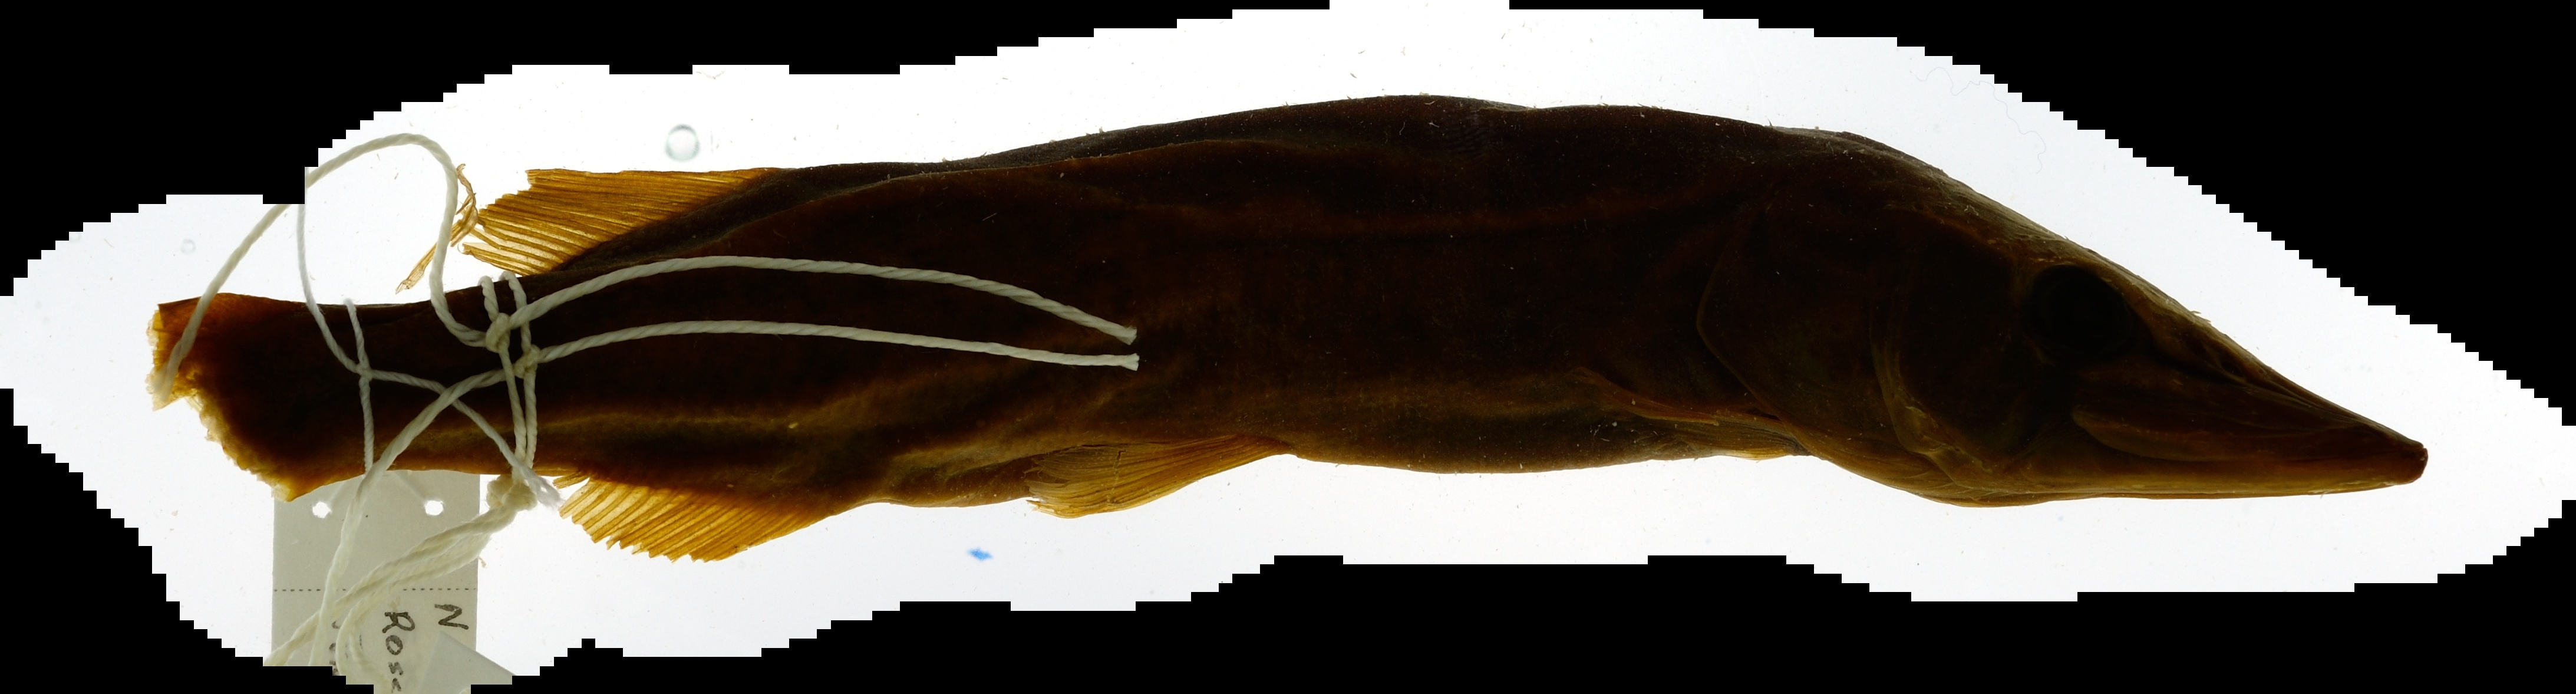

In [25]:
#think about fetching these in a more orderly fashion
#import json
#with open("../../experiments/smegma/params.json") as file:
#    content=json.load(file)

#let's go with the 3rd fish
badThirdFish=moige[moige.image_quality<2].index[2]
Image(filename=os.path.join("../../data/INHS_segmented_padded_fish/images/",badThirdFish))

In [26]:
badSci=moige[moige.image_quality<2]['scientificName'][2]
badSci

'Esox americanus'

In [27]:
goodComplement=moige[(moige.scientificName==badSci) & (moige.image_quality>9)].index[0]

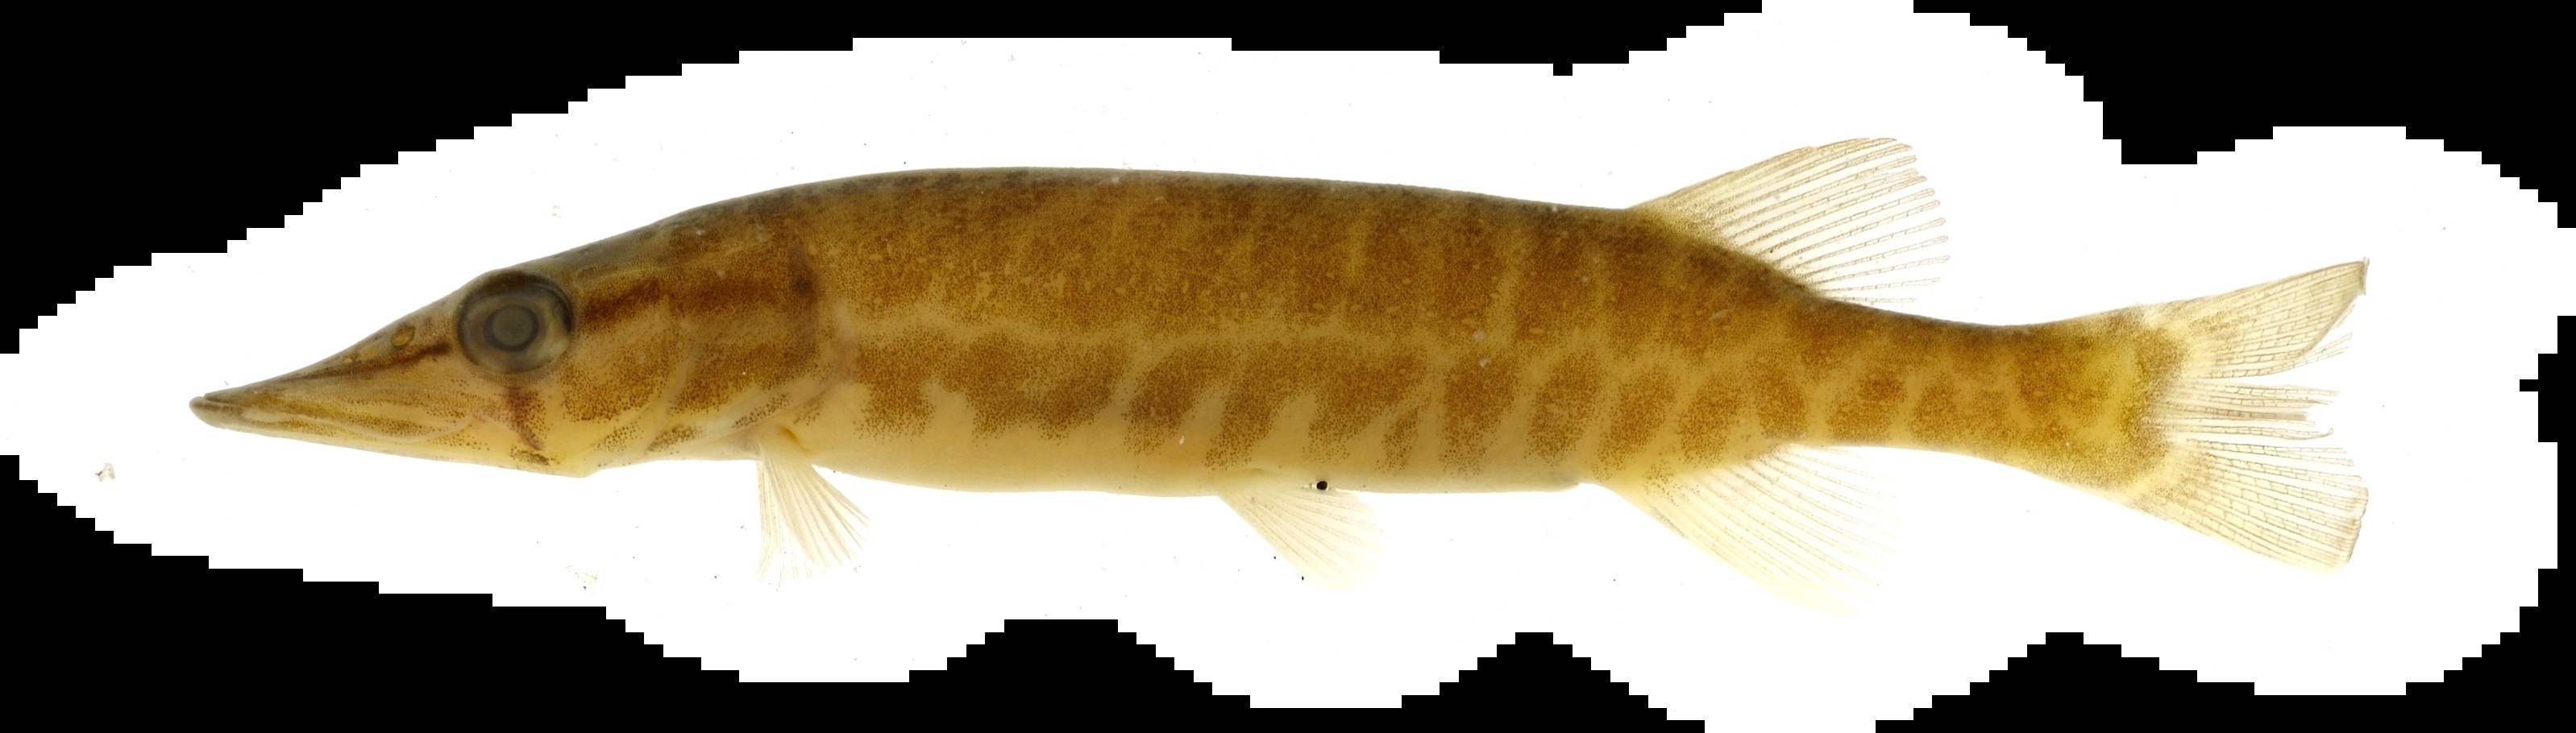

In [28]:
Image(filename=os.path.join("../../data/INHS_segmented_padded_fish/images/",goodComplement))

In [29]:
moige[(moige.scientificName==badSci) & (moige.image_quality>9)]

,id,height,width,if_fish,if_ruler,if_colorbar,relative_path,fish_number,non_specimen_objects,if_label,if_overlapping,specimen_angle,specimen_view,if_bent,landmark_failures_number,if_missing_parts,brightness,if_blur,if_color_issue,checked_flag,specimen_angled,specimen_viewing,color_issues,if_background_uniform,if_parts_visible,image_quality,label_detailed,if_each_fish_label,if_fins_folded,if_label_catalog_number_correct,if_label_name_correct,create_time,update_time,Family,Genus,scientificName,catalogNumber,fixedCatalogNumber,above_median_image_quality,qualSums,highiq,lowiq,highqs,lowqs
INHS_FISH_14642.jpg,6f95ef90-3f32-4eda-b6d2-8c4732bdb4f6,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_14642.jpg,1,no,1.0,-0.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,9,left,none,1.0,1.0,10.0,detailed,1.0,-0.0,1.0,1.0,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Esocidae,Esox,Esox americanus,14642,14642.0,True,4.0,True,False,True,False
INHS_FISH_15413.jpg,07504823-2934-41f3-9f11-21feeb6b497a,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_15413.jpg,1,no,1.0,-0.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,9,left,none,1.0,1.0,10.0,detailed,1.0,-0.0,1.0,1.0,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Esocidae,Esox,Esox americanus,15413,15413.0,True,4.0,True,False,True,False
INHS_FISH_16478.jpg,4d9f10b5-bee2-406b-a7ed-ec17edcea0f4,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_16478.jpg,1,no,1.0,-0.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,9,left,none,1.0,1.0,10.0,detailed,1.0,-0.0,1.0,1.0,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Esocidae,Esox,Esox americanus,16478,16478.0,True,4.0,True,False,True,False
INHS_FISH_16942.jpg,0a7ee89a-d9ee-41ec-bd79-added1690cdd,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_16942.jpg,1,no,1.0,-0.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,9,left,none,1.0,1.0,10.0,detailed,1.0,-0.0,1.0,1.0,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Esocidae,Esox,Esox americanus,16942,16942.0,True,4.0,True,False,True,False
INHS_FISH_17941.jpg,24044de0-5414-45ae-9a4f-bee7d830fcd4,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_17941.jpg,1,no,1.0,-0.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,9,left,none,1.0,1.0,10.0,detailed,1.0,-0.0,1.0,1.0,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Esocidae,Esox,Esox americanus,17941,17941.0,True,4.0,True,False,True,False
INHS_FISH_18432.jpg,63bdc839-a3c6-4932-891e-ffff34424d9f,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_18432.jpg,1,no,1.0,-0.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,9,left,none,1.0,1.0,10.0,detailed,1.0,-0.0,1.0,1.0,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Esocidae,Esox,Esox americanus,18432,18432.0,True,4.0,True,False,True,False
INHS_FISH_18903.jpg,ffa3e9bc-bb5a-4181-906a-4a41207e994a,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_18903.jpg,1,no,1.0,-0.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,9,left,none,1.0,1.0,10.0,detailed,1.0,-0.0,1.0,1.0,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Esocidae,Esox,Esox americanus,18903,18903.0,True,4.0,True,False,True,False
INHS_FISH_20066.jpg,702d2b48-bb05-47aa-bce0-efba10deea29,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_20066.jpg,1,no,1.0,-0.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,3,right,none,1.0,1.0,10.0,detailed,1.0,-0.0,1.0,1.0,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Esocidae,Esox,Esox americanus,20066,20066.0,True,4.0,True,False,True,False
INHS_FISH_30511.jpg,70d79d4d-3624-4d94-90b7-ada75b87a76b,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_30511.jpg,1,no,1.0,-0.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,9,left,none,1.0,1.0,10.0,detailed,1.0,-0.0,1.0,1.0,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Esocidae,Esox,Esox americanus,30511,30511.0,True,4.0,True,False,True,False
INHS_FISH_38306.jpg,f20c9699-36b4-4df1-b776-6e35401a67f9,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_38306.jpg,1,no,1.0,-0.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,9,left,none,1.0,1.0,10.0,detailed,1.0,-0.0,1.0,1.0,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Esocidae,Eso

In [30]:
#moige.groupby('highiq').apply(lambda x: x.sample(32,replace=False))


#moige.groupby('Genus').apply(lambda x: x.sample(int(len(x)*sample_size/nrows)))
sample_size = 140
nrows=len(moige[moige.lowiq == True])
lowsamples=moige[(moige.lowiq == True) & (moige.Genus != 'Morone')& (moige.Genus != 'Oncorhynchus')].groupby('Genus').apply(lambda x: x.sample(int(len(x)*sample_size/nrows)))

In [31]:
lowsamples.reset_index(drop=True)

,id,height,width,if_fish,if_ruler,if_colorbar,relative_path,fish_number,non_specimen_objects,if_label,if_overlapping,specimen_angle,specimen_view,if_bent,landmark_failures_number,if_missing_parts,brightness,if_blur,if_color_issue,checked_flag,specimen_angled,specimen_viewing,color_issues,if_background_uniform,if_parts_visible,image_quality,label_detailed,if_each_fish_label,if_fins_folded,if_label_catalog_number_correct,if_label_name_correct,create_time,update_time,Family,Genus,scientificName,catalogNumber,fixedCatalogNumber,above_median_image_quality,qualSums,highiq,lowiq,highqs,lowqs
0,25028944-b92a-492b-b7ef-b311ea651fab,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_98370.jpg,1,no,1.0,-0.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,9,left,none,0.0,1.0,8.0,detailed,NaN,NaN,NaN,NaN,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Cyprinidae,Cyprinus,Cyprinus carpio,98370,98370.0,True,3.0,False,True,False,True
1,02923163-0418-41b2-bc0c-d346c6f8a9fa,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_98296.jpg,1,no,1.0,-0.0,NaN,NaN,-1.0,NaN,-0.0,normal,1.0,NaN,True,9,left,none,1.0,0.0,6.0,detailed,NaN,NaN,NaN,NaN,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Cyprinidae,Cyprinus,Cyprinus carpio,98296,98296.0,False,3.0,False,True,False,True
2,168625bf-b608-411e-bd49-d57b60be90cb,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_99127B.jpg,1,"twine, tags",1.0,-1.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,9,left,contrast,0.0,0.0,3.0,basic,NaN,NaN,NaN,NaN,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Esocidae,Esox,Esox americanus,99127B,99127.0,False,2.0,False,True,False,True
3,86e64b7a-fc3a-4a11-a845-8524fa5fe326,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_99128.jpg,1,"twine, tags",1.0,-1.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,3,right,Entire specimen is dark,1.0,0.0,3.0,basic,NaN,NaN,NaN,NaN,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Esocidae,Esox,Esox lucius,99128,99128.0,False,3.0,False,True,False,True
4,4e06f6b1-5e6d-4704-83f4-f1206e6f1c46,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_97489.jpg,1,"twine, tag",1.0,-1.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,3,right,none,1.0,0.0,6.0,detailed,NaN,NaN,NaN,NaN,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Esocidae,Esox,Esox americanus,97489,97489.0,False,3.0,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,77aa6d24-dce8-4c1d-9721-679b2973f525,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_98154.jpg,1,no,1.0,-1.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,9,left,none,0.0,1.0,7.0,detailed,NaN,NaN,NaN,NaN,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Leuciscidae,Phenacobius,Phenacobius mirabilis,98154,98154.0,False,3.0,False,True,False,True
122,7aa3023e-d39b-41c4-be40-027122b03072,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_9822.jpg,1,no,1.0,-1.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,9,left,none,0.0,1.0,8.0,detailed,NaN,NaN,NaN,NaN,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Leuciscidae,Phenacobius,Phenacobius mirabilis,9822,9822.0,True,3.0,False,True,False,True
123,e6f1cafb-02ce-4745-a24d-4c385d79239e,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_98140.jpg,1,no,1.0,-0.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,9,leftbottom,Small black spots on specimen,1.0,1.0,7.0,detailed,NaN,NaN,NaN,NaN,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Leuciscidae,Phenacobius,Phenacobius mirabilis,98140,98140.0,False,4.0,False,True,False,True
124,be365022-a316-401e-a2fe-44117b5bc7b2,4016,6016,1.0,1.0,0.0,/INHS/INHS_FISH_13060.jpg,1,no,1.0,-0.0,NaN,NaN,-0.0,NaN,-0.0,normal,1.0,NaN,True,9,left,none,0.0,1.0,8.0,detailed,1.0,-0.0,1.0,1.0,2020-06-18 07:04:46.913199-05,2020-06-18 07:04:47.323223-05,Leuciscidae,Phenacobius,Phenacobius mirabilis,13060,13060.0,True,3.0,False,True,False,True


Let's sample the high-quality images using the genus counts in the low quality images to ensure a fair comparison

In [32]:
#highsamples=moige[moige.highiq == True].groupby('Genus').apply(lambda x: \
#        x.sample(len(lowsamples[lowsamples['Genus']==x['Genus']])))

highsamples=moige[moige.highiq == True].groupby('Genus').apply(lambda x: \
        x.sample(int(sum(lowsamples.Genus==x.Genus.iloc[0]))))
#    /nrows)*total_sample_size)

#.groupby('Genus','highiq').agg(count=('id','size'))

In [33]:
highsamples.reset_index(drop=True).groupby('Genus').size()


Genus
Cyprinus        2
Esox           10
Gambusia        7
Lepomis        40
Neogobius       1
Notropis       50
Noturus        10
Phenacobius     6
dtype: int64

In [34]:
lowsamples.reset_index(drop=True).groupby('Genus').size()

Genus
Cyprinus        2
Esox           10
Gambusia        7
Lepomis        40
Neogobius       1
Notropis       50
Noturus        10
Phenacobius     6
dtype: int64

In [35]:
lowsamples.reset_index(drop=True).groupby('Genus').size().sum()

126

In [36]:
highsamples.reset_index(drop=True).groupby('Genus').size().sum()

126

In [37]:
highids=highsamples.reset_index(drop=True)['id']
lowids=lowsamples.reset_index(drop=True)['id']

In [38]:
highids

0      6620545b-0915-4701-b08a-e3513e88eada
1      b519098b-d80f-45e3-b193-9c12677f2125
2      6f95ef90-3f32-4eda-b6d2-8c4732bdb4f6
3      85aac4a0-d96b-4ee4-9435-7e7b6a8b1eb4
4      853e8566-2fcf-4b66-a5b2-e729b6a223ca
                       ...                 
121    b7cfd9d3-0248-49b1-a1e4-1e27477a770f
122    cdd8dfe0-72ab-411c-bf03-acabe9373677
123    d5c2372e-5374-49ae-8d64-3187e71c1339
124    286af1f8-59cd-4875-831d-6738f46c401a
125    e3621005-475f-4cba-9d8a-2ffd1fc7cf42
Name: id, Length: 126, dtype: object

In [39]:
lowids

0      25028944-b92a-492b-b7ef-b311ea651fab
1      02923163-0418-41b2-bc0c-d346c6f8a9fa
2      168625bf-b608-411e-bd49-d57b60be90cb
3      86e64b7a-fc3a-4a11-a845-8524fa5fe326
4      4e06f6b1-5e6d-4704-83f4-f1206e6f1c46
                       ...                 
121    77aa6d24-dce8-4c1d-9721-679b2973f525
122    7aa3023e-d39b-41c4-be40-027122b03072
123    e6f1cafb-02ce-4745-a24d-4c385d79239e
124    be365022-a316-401e-a2fe-44117b5bc7b2
125    c40cc5b7-9b71-4363-8d45-4a6d0271709a
Name: id, Length: 126, dtype: object

In [40]:
meta

,fileName,Family,Genus,scientificName,catalogNumber,fixedCatalogNumber
0,INHS_FISH_20096.JPG,Clupeidae,Alosa,Alosa alabamae,20096,20096
1,INHS_FISH_38236.JPG,Clupeidae,Alosa,Alosa alabamae,38236,38236
2,INHS_FISH_38418.JPG,Clupeidae,Alosa,Alosa alabamae,38418,38418
3,INHS_FISH_38440.JPG,Clupeidae,Alosa,Alosa alabamae,38440,38440
4,INHS_FISH_38781.JPG,Clupeidae,Alosa,Alosa alabamae,38781,38781
...,...,...,...,...,...,...
23083,INHS_FISH_60802.jpg,Leuciscidae,Semotilus,Semotilus atromaculatus,60802,60802
23084,INHS_FISH_65283.jpg,Leuciscidae,Semotilus,Semotilus atromaculatus,65283,65283
23085,INHS_FISH_107123.jpg,Leuciscidae,Semotilus,Semotilus atromaculatus,107123,107123
23086,INHS_FISH_66322.jpg,Triportheidae,Triportheus,Triportheus albus,66322,66322


In [41]:
#fileName	scientificName	Genus	Family
#INHS_FISH_59772.jpg	Lepomis cyanellus	Lepomis	Centrarchidae
moige['fileName']=moige.index
moige=moige.set_index('id')

In [48]:
moige.loc[highids][['fileName','scientificName','Family','Genus']].reset_index(drop=True).to_csv('../../high_qual_metadata.tsv',sep="\t",index=False)
moige.loc[lowids][['fileName','scientificName','Family','Genus']].reset_index(drop=True).to_csv('../../low_qual_metadata.tsv',sep="\t",index=False)
